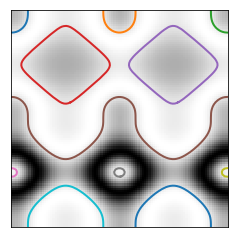

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import measure
from skimage import feature
from skimage.util import invert
from skimage.morphology import convex_hull_image

def load_2d_image(image_url):
    img = cv2.imread(image_url)
    return rgb2gray(img)

image_url = "/media/andres/Data/spaceinvaders/atari_v1/screens/spaceinvaders/1/251.png"

image = load_2d_image(image_url)



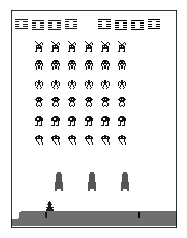

In [5]:
image_temp = image
image_temp = invert(image)

contours = measure.find_contours(image_temp, 0.5)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image_temp, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
#contour = contours[65]
#ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])

plt.show()



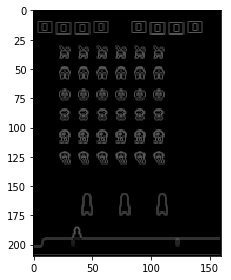

In [4]:
from skimage import data, io, filters

image_temp = image
edges = filters.sobel(image_temp)
io.imshow(edges)
io.show()



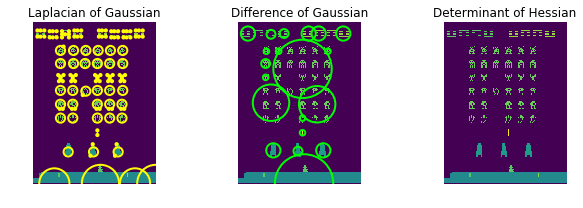

In [15]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()


0.16497242647058824


/home/andres/TesisExperiments/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


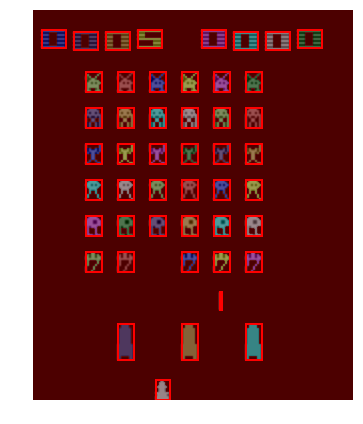

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import *
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

def load_2d_image(image_url):
    img = cv2.imread(image_url)
    return rgb2gray(img)

image_url = "/media/andres/Data/spaceinvaders/atari_v1/screens/spaceinvaders/1/251.png"

image = load_2d_image(image_url)
image = image[0:195,0:160]

image = resize(image, (image.shape[0] * 2, image.shape[1] * 2),
                       anti_aliasing=True)

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))
# bw = image <= thresh
print(thresh)

# remove artifacts connected to image border
cleared = bw #clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    # print(region.bbox)
    if region.area >= 10:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

/home/andres/TesisExperiments/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


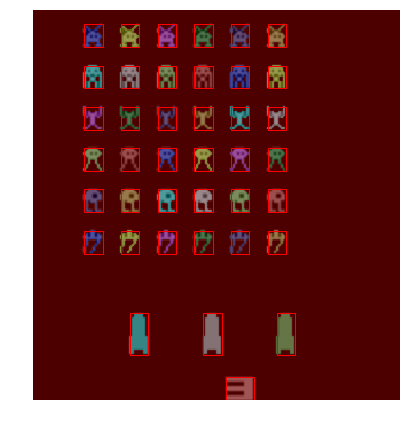

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import *
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image_url = "/media/andres/Data/spaceinvaders/atari_v1/screens/spaceinvaders/1/1.png"

image = load_2d_image(image_url)
image = image[25:195,0:160]

image = resize(image, (image.shape[0] * 2, image.shape[1] * 2),
                       anti_aliasing=True)

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))
# bw = image <= thresh

# remove artifacts connected to image border
cleared = bw #clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    # print(region.bbox)
    if region.area >= 10:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

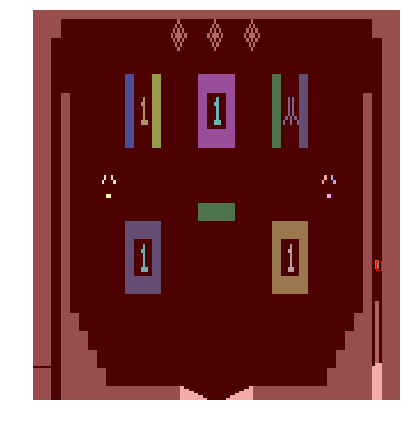

In [82]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import *
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image_url = "/media/andres/Data/pinball/atari_v1/screens/pinball/1/250.png"

image = load_2d_image(image_url)
image = image[25:195,0:160]

#image = resize(image, (image.shape[0] * 2, image.shape[1] * 2),
#                       anti_aliasing=True)

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(1))
# bw = image <= thresh

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    # print(region.bbox)
    if region.area >= 5 and region.area <= 8:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

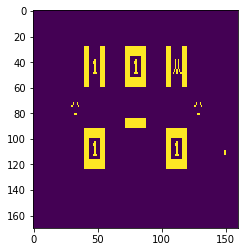

In [83]:
plt.imshow(cleared)